In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 
rcParams['figure.figsize'] = 10, 5

week
2010-01-10    110.281531
2010-01-17     95.692643
2010-01-24     89.384712
2010-01-31    104.281969
2010-02-07    107.624766
Name: elastic net, dtype: float64


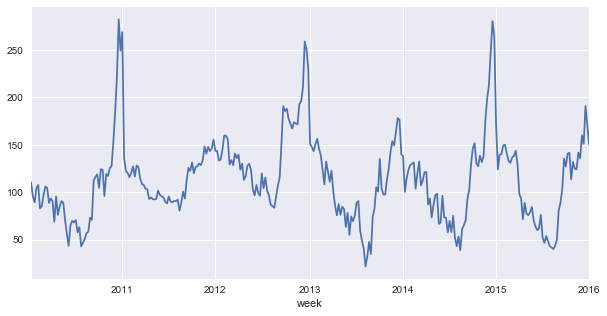

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('predicted_rate.csv',parse_dates=['week'],index_col=0,date_parser=dateparse)

data1 = data['elastic net']
data2 = data['real_rates']

print(data1.head())
data1.plot()
pyplot.show()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data1)
pyplot.show()

In [ ]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

 
# fit model
model = ARIMA(data1, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [3]:
elastic_net=data1.values
true=data2.values

### 2012

In [37]:
train_2012, test_2012 = elastic_net[104:156], true[104:156]

import statsmodels.api as sm
model = sm.tsa.SARIMAX(endog=test_2012,exog=train_2012, order=(9,0,3))

results_2012=model.fit()
predictions_2012=results_2012.predict()

In [38]:
from sklearn.metrics import mean_squared_error
p_2012=predictions_2012[:]
t_2012=test_2012[:]
tra_2012=train_2012[:]
error=mean_squared_error(t_2012, p_2012)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:14.2705


In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2012, p_2012)
MAE=mean_absolute_error(t_2012, p_2012)
print ('MAE:%.4f'% MAE)

MAE:11.5024


In [43]:
MAPE=mean_absolute_percentage_error( t_2012,  p_2012)
print ('MAPE:%.4f'% MAPE)

MAPE:13.1482


In [62]:
np.corrcoef(t_2012, p_2012)

array([[ 1.        ,  0.94403673],
       [ 0.94403673,  1.        ]])

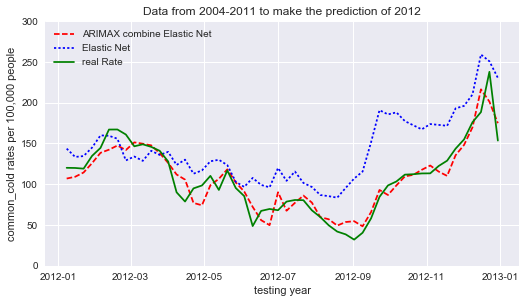

In [84]:
L=data1.index[104:156]
df = pd.DataFrame(data=p_2012, index=L,columns=["combine_rate"])
df1 = pd.DataFrame(data=t_2012, index=L,columns=["rate"])
df2 = pd.DataFrame(data=tra_2012, index=L,columns=["elastic_rate"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(df, label='ARIMAX combine Elastic Net',ls='dashed',c='red')
line_middle,=plt.plot(df2, label='Elastic Net',ls='dotted',c='blue')
line_down, = plt.plot(df1, label='real Rate',ls='solid', c='green')
plt.legend(handles=[line_up,line_middle,line_down])

plt.title('Data from 2004-2011 to make the prediction of 2012')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()

### 2013

In [46]:
train_2013, test_2013 = elastic_net[156:208], true[156:208]

import statsmodels.api as sm
model = sm.tsa.SARIMAX(endog=test_2013,exog=train_2013, order=(13,0,1))

results_2013=model.fit()
predictions_2013=results_2013.predict()

In [47]:
from sklearn.metrics import mean_squared_error
p_2013=predictions_2013[:]
t_2013=test_2013[:]
tra_2013=train_2013[:]
error=mean_squared_error(t_2013, p_2013)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:13.5595


In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2013, p_2013)
MAE=mean_absolute_error(t_2013, p_2013)
print ('MAE:%.4f'% MAE)

MAE:10.3481


In [49]:
MAPE=mean_absolute_percentage_error( t_2013,  p_2013)
print ('MAPE:%.4f'% MAPE)

MAPE:11.1791


In [63]:
np.corrcoef(t_2013, p_2013)

array([[ 1.        ,  0.94085881],
       [ 0.94085881,  1.        ]])

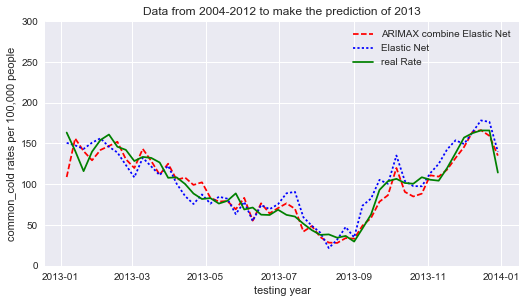

In [83]:
L=data1.index[156:208]
df = pd.DataFrame(data=p_2013, index=L,columns=["combine_rate"])
df1 = pd.DataFrame(data=t_2013, index=L,columns=["rate"])
df2 = pd.DataFrame(data=tra_2013, index=L,columns=["elastic_rate"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(df, label='ARIMAX combine Elastic Net',ls='dashed',c='red')
line_middle,=plt.plot(df2, label='Elastic Net',ls='dotted',c='blue')
line_down, = plt.plot(df1, label='real Rate',ls='solid', c='green')
plt.legend(handles=[line_up,line_middle,line_down])

plt.title('Data from 2004-2012 to make the prediction of 2013')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()

### 2014

In [52]:
train_2014, test_2014 = elastic_net[208:260], true[208:260]

import statsmodels.api as sm
model = sm.tsa.SARIMAX(endog=test_2014,exog=train_2014, order=(2,0,1))

results_2014=model.fit()
predictions_2014=results_2014.predict()

In [51]:
from sklearn.metrics import mean_squared_error
p_2014=predictions_2014[:]
t_2014=test_2014[:]
tra_2014=train_2014[:]
error=mean_squared_error(t_2014, p_2014)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:15.6345


In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2014, p_2014)
MAE=mean_absolute_error(t_2014, p_2014)
print ('MAE:%.4f'% MAE)

MAE:11.5287


In [61]:
MAPE=mean_absolute_percentage_error(test_2014, predictions_2014)
print ('MAPE:%.4f'% MAPE)

MAPE:11.8504


In [64]:
np.corrcoef(t_2014, p_2014)

array([[ 1.        ,  0.94033191],
       [ 0.94033191,  1.        ]])

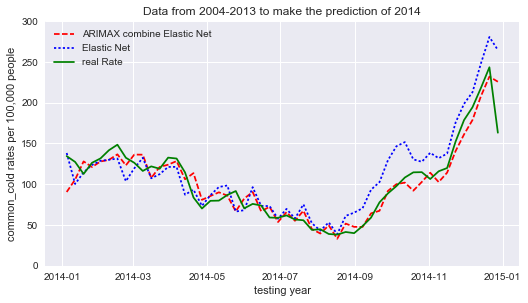

In [82]:
L=data1.index[208:260]
df = pd.DataFrame(data=p_2014, index=L,columns=["combine_rate"])
df1 = pd.DataFrame(data=t_2014, index=L,columns=["rate"])
df2 = pd.DataFrame(data=tra_2014, index=L,columns=["elastic_rate"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(df, label='ARIMAX combine Elastic Net',ls='dashed',c='red')
line_middle,=plt.plot(df2, label='Elastic Net',ls='dotted',c='blue')
line_down, = plt.plot(df1, label='real Rate',ls='solid', c='green')
plt.legend(handles=[line_up,line_middle,line_down])

plt.title('Data from 2004-2013 to make the prediction of 2014')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()

### 2015

In [56]:
train_2015, test_2015 = elastic_net[260:332], true[260:332]

import statsmodels.api as sm
model = sm.tsa.SARIMAX(endog=train_2015,exog=test_2015, order=(1,0,0))

results_2015=model.fit()
predictions_2015=results_2015.predict()

In [57]:
from sklearn.metrics import mean_squared_error
p_2015=predictions_2015[:]
t_2015=test_2015[:]
tra_2015=train_2015[:]
error=mean_squared_error(t_2015, p_2015)
RMSE=np.sqrt(error)
print ('RMSE:%.4f'% RMSE)

RMSE:11.6420


In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(t_2015, p_2015)
MAE=mean_absolute_error(t_2015, p_2015)
print ('MAE:%.4f'% MAE)

MAE:7.8906


In [59]:
MAPE=mean_absolute_percentage_error( t_2015,  p_2015)
print ('MAPE:%.4f'% MAPE)

MAPE:8.5340


In [65]:
np.corrcoef(t_2015, p_2015)

array([[ 1.        ,  0.96089072],
       [ 0.96089072,  1.        ]])

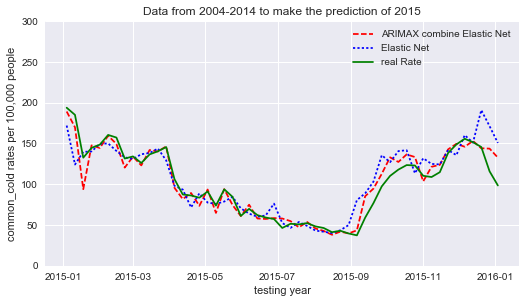

In [81]:
L=data1.index[260:332]
df = pd.DataFrame(data=p_2015, index=L,columns=["combine_rate"])
df1 = pd.DataFrame(data=t_2015, index=L,columns=["rate"])
df2 = pd.DataFrame(data=tra_2015, index=L,columns=["elastic_rate"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(df, label='ARIMAX combine Elastic Net',ls='dashed',c='red')
line_middle,=plt.plot(df2, label='Elastic Net',ls='dotted',c='blue')
line_down, = plt.plot(df1, label='real Rate',ls='solid', c='green')
plt.legend(handles=[line_up,line_middle,line_down])

plt.title('Data from 2004-2014 to make the prediction of 2015')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))
pyplot.show()